In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("./common/data"))

os.environ["CUDA_VISIBLE_DEVICES"]="1"

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

['chest_xray', 'resampled', 'TEST']


Using TensorFlow backend.


# Resample Data Into New Dataset

# Resample Train Data

In [2]:
from common.src import resample as res

In [3]:
from imblearn.over_sampling import RandomOverSampler

path = r'C:\Users\mmitk\dev\2020\pneumonia\common\data\chest_xray\train'
ros = RandomOverSampler(random_state=0)

In [4]:
res.resample_directory(ros, path, 'ROS', val = False)

# Load Data

In [5]:
train_folder= './common/data/resampled/ROS/train'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

Set up Training Folders

In [6]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

Set up Testing Folders

In [7]:
# test
os.listdir(test_folder)
train_n = test_folder+'NORMAL/'
train_p = test_folder+'PNEUMONIA/'

# Generate Dataset from image data

In [8]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/resampled/ROS/train')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/') 

Found 7750 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create Model

In [9]:
from common.src import models

cnn = models.CNNModel()
cnn.create_model()
cnn.summary()

# Fit Model

In [10]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs = 20)

Epoch 1/20
163/163 [==============================] - 260s 2s/step - loss: 0.4209 - tp: 4133.0000 - fp: 1125.0000 - tn: 4091.0000 - fn: 1083.0000 - accuracy: 0.7883 - precision: 0.7860 - recall: 0.7924 - auc: 0.8882 - val_loss: 0.3051 - val_tp: 9360.0000 - val_fp: 624.0000 - val_tn: 9360.0000 - val_fn: 624.0000 - val_accuracy: 0.9375 - val_precision: 0.9375 - val_recall: 0.9375 - val_auc: 0.9492
Epoch 2/20
163/163 [==============================] - 245s 2s/step - loss: 0.2511 - tp: 4649.0000 - fp: 517.0000 - tn: 4647.0000 - fn: 515.0000 - accuracy: 0.9001 - precision: 0.8999 - recall: 0.9003 - auc: 0.9610 - val_loss: 0.2706 - val_tp: 8112.0000 - val_fp: 1872.0000 - val_tn: 8112.0000 - val_fn: 1872.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9648
Epoch 3/20
163/163 [==============================] - 244s 1s/step - loss: 0.2375 - tp: 4721.0000 - fp: 497.0000 - tn: 4719.0000 - fn: 495.0000 - accuracy: 0.9049 - precision: 0.9048 - recall: 0.9051 - 

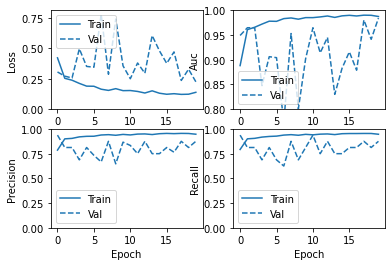

In [11]:
cnn.plot_history()

In [12]:
cnn.get_classification_report(test_set)

              precision    recall  f1-score   support

      NORMAL       0.35      0.32      0.34       234
   PNEUMONIA       0.61      0.64      0.63       390

    accuracy                           0.52       624
   macro avg       0.48      0.48      0.48       624
weighted avg       0.52      0.52      0.52       624



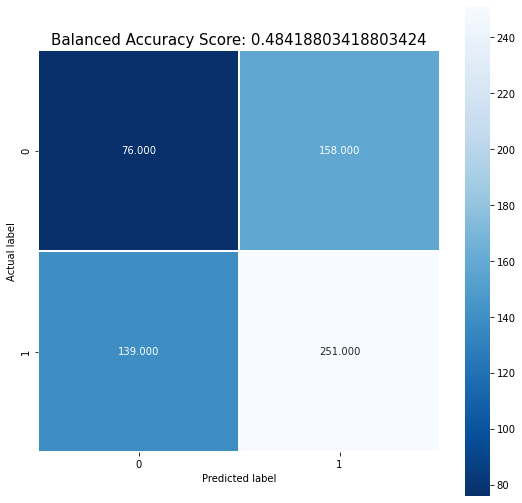

In [13]:
cnn.display_confusion_matrix(test_set)

In [14]:
res.remove_resampled_directory('./common/data/resampled/ROS')